# Convolution Tests

In [1]:
import numpy as np
from scipy.ndimage import convolve, correlate

import convolution

In [2]:
X = np.array(
    [
        [1 , 2 , 3 , 4 , 5 , 6 , 7 ],
        [8 , 9 , 10, 11, 12, 13 ,14],
        [15, 16, 17, 18, 19, 20, 21],
        [22, 23, 24, 25, 26, 27, 28]
    ]
    )
K = np.array(
    [[0, -1, 0],
     [-1, 4, -1],
     [0 ,-1, 0]])

print("X:")
print(X)

X:
[[ 1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14]
 [15 16 17 18 19 20 21]
 [22 23 24 25 26 27 28]]


In [3]:
crop  = (2, 2)
dim_e = convolution.get_dim_ext(K.shape, crop)
er, ec = dim_e

print(crop)
print(dim_e)

(2, 2)
(1, 1)


Compare with Scipy routine

In [4]:
convolution.convolve2d(X, K, crop, edge_mode="constant", edge_params=[2])

array([[-10.,  -7.,  -6.,  -5.,  -4.,  -3.,   4.],
       [  5.,   0.,   0.,   0.,   0.,   0.,  13.],
       [ 12.,   0.,   0.,   0.,   0.,   0.,  20.],
       [ 46.,  28.,  29.,  30.,  31.,  32.,  60.]])

In [5]:
convolve(X, K, mode="constant", cval = 2) #scipy convolve

array([[-10,  -7,  -6,  -5,  -4,  -3,   4],
       [  5,   0,   0,   0,   0,   0,  13],
       [ 12,   0,   0,   0,   0,   0,  20],
       [ 46,  28,  29,  30,  31,  32,  60]])

1dim array * 1dim array = matrix generation

In [6]:
x = np.array([[1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]])
y = np.array(
    [[0],[1],[0],[1],[0],[1],[0],[1],[0],[1], [0]])
d = convolution.convolve2d(x, y, (1,1), edge_mode="constant", edge_params=[0])
print(x.shape, y.shape, "->", d.shape)


(1, 11) (11, 1) -> (11, 11)


In [7]:
d

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

---

In [3]:
import numpy as np
import convolution

In [4]:
#m =8
#k = 3
#=======
k = 5
m = 2*k-1
sample_h = np.arange(k) +1
print(sample_h)

[1 2 3 4 5]


In [5]:
convolution._vec2sub_toeplitz(sample_h, m)

array([[1., 2., 3., 4., 5., 0., 0., 0., 0.],
       [0., 1., 2., 3., 4., 5., 0., 0., 0.],
       [0., 0., 1., 2., 3., 4., 5., 0., 0.],
       [0., 0., 0., 1., 2., 3., 4., 5., 0.],
       [0., 0., 0., 0., 1., 2., 3., 4., 5.]])

In [37]:
X = np.arange(49).reshape(7,7)
K = np.array(
    [[-1, -1, -1, -1],
     [-1,  4, 4 , -1],
     [-1,  4, 4 , -1],
     [-1, -1, -1, -1]])
n1,m1 = X.shape
l, k = K.shape
crop = (1, 1)
dim_conv = convolution.get_dim_convole((n1,m1),(l,k),crop)
er, ec = convolution.get_dim_ext((l, k), crop)

In [38]:
X_ext = convolution._expand_matrix(X, (er, ec), ["constant", 0])
X_ext

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  9., 10., 11., 12., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14., 15., 16., 17., 18., 19., 20.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 21., 22., 23., 24., 25., 26., 27.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 28., 29., 30., 31., 32., 33., 34.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 35., 36., 37., 38., 39., 40., 41.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 42., 43., 44., 45., 46., 47., 48.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [25]:
X_ext.shape

(7, 7)

In [39]:
A, x =convolution.convolve2toeplitz(
    K,
    X,
    crop = crop
)

In [40]:
A.shape

(100, 256)

In [41]:
x.shape

(256,)

In [35]:
A

array([[ 0.,  1.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 48.,  0.,  0.],
       [ 0.,  0.,  0., ..., 47., 48.,  0.],
       [ 0.,  0.,  0., ..., 46., 47., 48.]])

In [34]:
R = A.dot(x).reshape(dim_conv)
print(R.shape)
R

(4, 4)


array([[144., 140., 136., 132.],
       [116., 112., 108., 104.],
       [ 88.,  84.,  80.,  76.],
       [ 60.,  56.,  52.,  48.]])

In [14]:
convolution.convolve2d(X, K, crop, edge_mode="constant", edge_params=[0])

array([[   0.,   -1.,   -3.,   -6.,   -9.,  -12.,   -9.,   -5.],
       [  -6.,  -14.,  -19.,  -20.,  -21.,  -22.,   -5.,  -16.],
       [ -18.,   -9.,  -28.,  -32.,  -36.,  -40.,   -8.,  -33.],
       [ -36.,  -15.,  -52.,  -56.,  -60.,  -64.,  -14.,  -51.],
       [ -54.,  -21.,  -76.,  -80.,  -84.,  -88.,  -20.,  -69.],
       [ -72.,  -27., -100., -104., -108., -112.,  -26.,  -87.],
       [ -54.,   40.,  -13.,  -14.,  -15.,  -16.,   49.,  -64.],
       [ -30.,  -61.,  -93.,  -96.,  -99., -102.,  -69.,  -35.]])

In [59]:
def get_matrix_system(data, filter):
    n,m = data.shape
    l, k= filter.shape

    if k != 2*m-1 or l != 2*n-1:
        raise ValueError("Invaild dimension: l, k must be 2n-1, 2m-1")
    
    rows = []
    for i in range(0, n):
        row_i = n-1-i
        row_f = 2*n-1-i

        for j in range(0, m):
            column_i = m-1 -j
            column_f = 2*m-1 -j

            #print(row_i, row_f)
            #print(column_i, column_f)

            t = filter[row_i : row_f, column_i:column_f]

            #print(t.shape)
            rows.append(t.flatten())

    #mat = np.vstack(rows)
    return rows, data.flatten()

In [15]:
K = np.array(
    [[-0, 0, 0, 0, 0],
     [-0, 4, 4, 4, 0],
     [-0, 4,  8, 4, 0],
     [-0, 4, -1, 4, 0],
     [-0, 0, 0, 0, 0]])
l, k = K.shape
n = 3
m = 3
X = np.arange(9).reshape(3,3)

In [73]:
B, c = get_matrix_system(X, K)

In [16]:
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [74]:
B

[array([ 8,  4,  0, -1,  4,  0,  0,  0,  0]),
 array([ 4,  8,  4,  4, -1,  4,  0,  0,  0]),
 array([ 0,  4,  8,  0,  4, -1,  0,  0,  0]),
 array([ 4,  4,  0,  8,  4,  0, -1,  4,  0]),
 array([ 4,  4,  4,  4,  8,  4,  4, -1,  4]),
 array([ 0,  4,  4,  0,  4,  8,  0,  4, -1]),
 array([0, 0, 0, 4, 4, 0, 8, 4, 0]),
 array([0, 0, 0, 4, 4, 4, 4, 8, 4]),
 array([0, 0, 0, 0, 4, 4, 0, 4, 8])]

In [75]:
np.linalg.det(B)

-29491199.999999914

---

In [1]:
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..\..")
from scipy.ndimage import convolve
from scipy.optimize import least_squares, nnls
import numpy as np
from matplotlib import pyplot as plt

from uilc import PositionArray
from uilc.utils import radiation
import convolution

In [28]:
s= 45
H = 0.1
W= 0.1


In [35]:
n=80
k = 2*n-1
d = lambda i, j, n: (n/2-i)**2 + (n/2-j)**2
dw = W/n

In [36]:
filter =np.fromfunction(lambda i, j: radiation.lambertian(0, (dw) *np.sqrt(d(i, j, k)), s, H), (k,k), dtype=float)
distribution = np.where(np.random.rand(*(k, k)) >= 0.98, 1, 0)
intensity = convolve(distribution, filter, mode='constant', cval=0.0)

In [37]:
filter.shape

(159, 159)

In [38]:
A = convolution.get_matrix_system(filter, (n, n))
if np.fabs(np.linalg.det(A)) < 1E-100000:
    pass
else: 
    dim_l = A.shape[0]
    const = np.ones(shape=(dim_l,))
    sol = nnls(A, const)[0]

In [39]:
sol2d = sol.reshape((n,n))
sol2d = sol2d/sol2d.max()
sol2d.min()

0.0

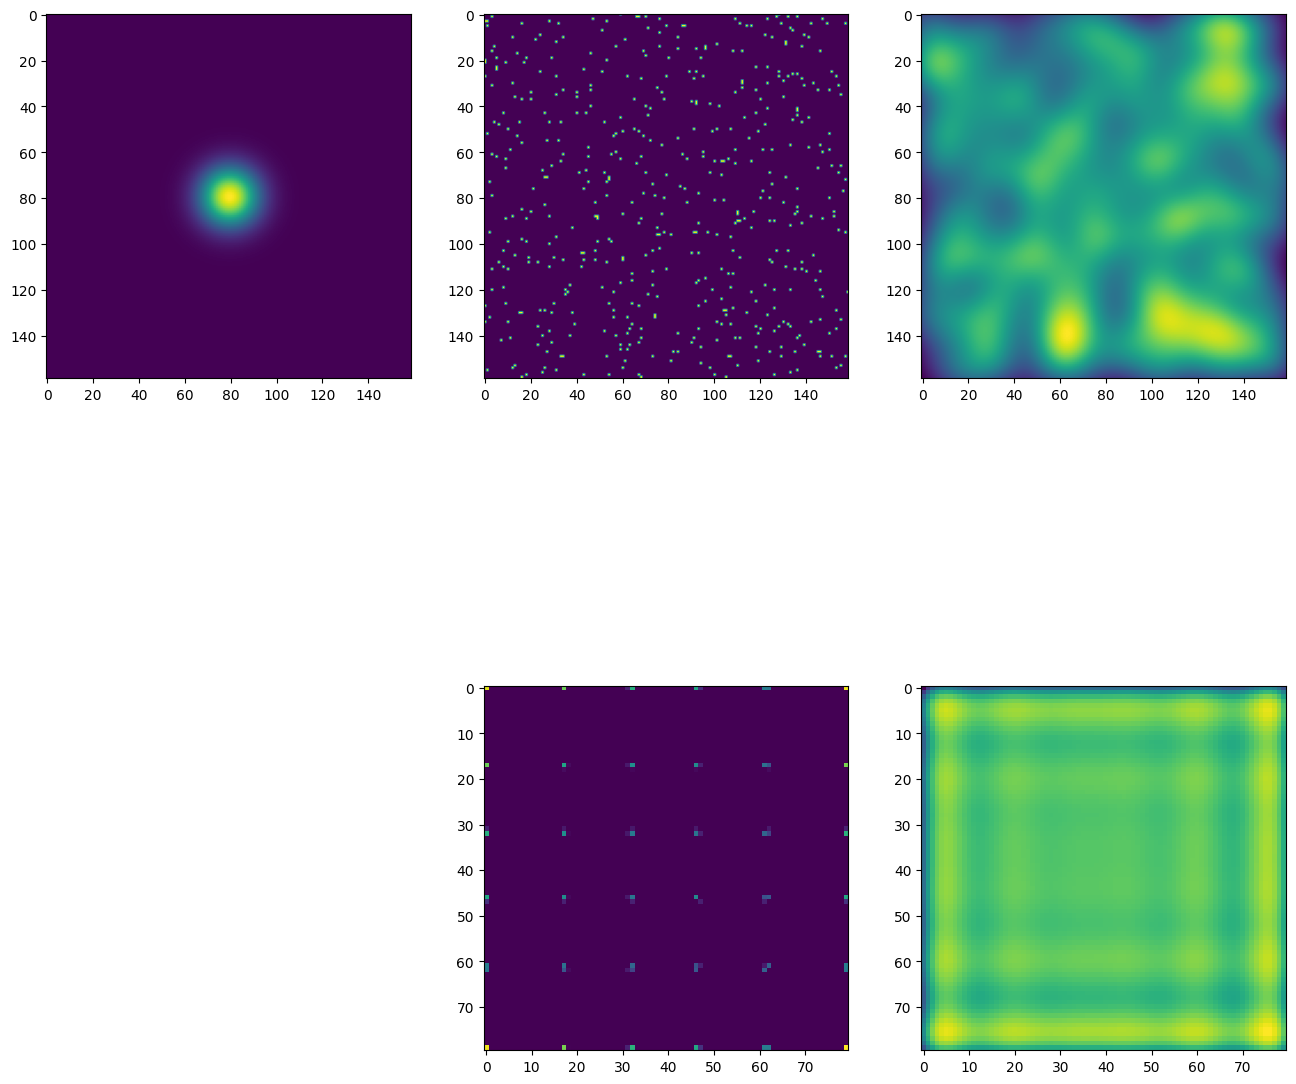

In [40]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2, 3, 1)# filter
ax2 = fig.add_subplot(2, 3, 2)# distribution
ax3 = fig.add_subplot(2, 3, 3)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)
ax1.imshow(filter)
ax2.imshow(distribution)
ax3.imshow(intensity)
ax5.imshow(sol2d)
ax6.imshow(convolve(sol2d, filter, mode='constant', cval=0.0))
plt.show()